In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-genre-classification/submission.csv
/kaggle/input/music-genre-classification/train.csv
/kaggle/input/music-genre-classification/test.csv


In [65]:
df_train=pd.read_csv('/kaggle/input/music-genre-classification/train.csv')
df_test=pd.read_csv('/kaggle/input/music-genre-classification/test.csv')

In [66]:
df_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [68]:
df_train.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [70]:
df_test.isna().sum()

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [71]:
df_train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


<AxesSubplot:>

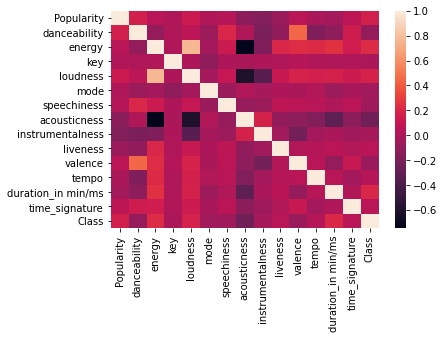

In [72]:
sns.heatmap(df_train.corr())

In [73]:
df=pd.concat([df_train.iloc[:,:-1],df_test])
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.00000,4
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.00000,4
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.00000,4
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.00000,4
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.00000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,Dudu Aharon,◊ë◊ó◊ï◊® ◊®◊í◊ô◊©,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.264000,NaN,0.0735,0.6430,128.019,231680.00000,4
7709,Elephant Tree,Echoes,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.025400,0.009330,0.3620,0.2570,127.446,367879.00000,4
7710,Shankar Mahadevan,Man Mohini,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.159000,0.000011,0.0590,0.6910,135.224,2.45355,4
7711,Talking Heads,Life During Wartime - 2005 Remaster,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.080600,0.152000,0.0558,0.9670,133.255,221320.00000,4


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25709 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         25709 non-null  object 
 1   Track Name          25709 non-null  object 
 2   Popularity          25054 non-null  float64
 3   danceability        25709 non-null  float64
 4   energy              25709 non-null  float64
 5   key                 22887 non-null  float64
 6   loudness            25709 non-null  float64
 7   mode                25709 non-null  int64  
 8   speechiness         25709 non-null  float64
 9   acousticness        25709 non-null  float64
 10  instrumentalness    19423 non-null  float64
 11  liveness            25709 non-null  float64
 12  valence             25709 non-null  float64
 13  tempo               25709 non-null  float64
 14  duration_in min/ms  25709 non-null  float64
 15  time_signature      25709 non-null  int64  
dtypes: fl

In [75]:
df.isna().sum()

Artist Name              0
Track Name               0
Popularity             655
danceability             0
energy                   0
key                   2822
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      6286
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [76]:
df.duplicated().sum()

3358

In [77]:
#df.drop_duplicates(inplace=True)

In [78]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,25054.000000,25709.000000,25709.000000,22887.000000,25709.000000,25709.00000,25709.000000,25709.000000,19423.000000,25709.000000,25709.000000,25709.000000,2.570900e+04,25709.000000
mean,44.648360,0.544836,0.662983,5.944073,-7.889735,0.63962,0.079810,0.245377,0.175318,0.196818,0.487282,122.729307,2.003485e+05,3.922245
std,17.420299,0.165872,0.235204,3.209502,4.029280,0.48012,0.083771,0.309852,0.302269,0.159871,0.239539,29.617081,1.123260e+05,0.364073
min,1.000000,0.000000,0.000020,1.000000,-39.952000,0.00000,0.000000,0.000000,0.000001,0.011900,0.000000,0.000000,5.016500e-01,0.000000
25%,33.000000,0.434000,0.509000,3.000000,-9.532000,0.00000,0.034800,0.004370,0.000089,0.097700,0.300000,99.633000,1.660920e+05,4.000000
50%,44.000000,0.546000,0.700000,6.000000,-6.988000,1.00000,0.047300,0.079800,0.003950,0.130000,0.482000,120.259000,2.090710e+05,4.000000
75%,56.000000,0.660000,0.861000,9.000000,-5.188000,1.00000,0.083100,0.425000,0.188000,0.258000,0.672000,141.978000,2.521330e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.00000,0.960000,0.996000,0.996000,1.000000,0.986000,249.438000,1.561133e+06,5.000000


In [79]:
#finding the mode of key column
k=df['key'].mode()
k

0    7.0
dtype: float64

In [80]:
df['key'].replace(np.NaN,k[0],inplace=True)###replacing the null values in the key column by its mode

In [81]:
j=df['instrumentalness'].median()###finding the median of instrumentalness column
j

0.00395

In [82]:
df['instrumentalness'].replace(np.NaN,j,inplace=True)###replacing the null values in instrumentalness column by its median

In [83]:
df.isna().sum()

Artist Name             0
Track Name              0
Popularity            655
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [84]:
h=df['Popularity'].mode()
h

0    42.0
dtype: float64

In [85]:
df['Popularity'].replace(np.NaN,h[0],inplace=True)###replacing the null values in popularity column with its mode

In [86]:
df.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

<AxesSubplot:>

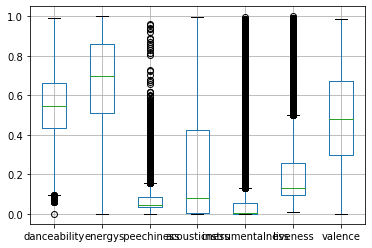

In [87]:
df.boxplot(column=['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'])
##diplaying the boxplot for columns mentioned
##from the below boxplots we can see that columns danceability, speechiness,instrumentalness, liveness have Outliers

In [88]:
#defining function for removing outlier
def remove_outlier(col):
    sorted(col)
    q1,q2=col.quantile([0.25,0.75])
    IQR=q2-q1
    lr=q1-(1.5*IQR) #1.5 general constant
    ub=q2+(1.5*IQR)
    return lr,ub

In [89]:
#Removing Outliers from danceability column
lscore,upperscore = remove_outlier(df['danceability'])#calling remove_outlier function for danceability
df['danceability']=np.where(df['danceability']>upperscore,upperscore,df['danceability'])#values which are greater than uscore are virtually removed
df['danceability']=np.where(df['danceability']<lscore,lscore,df['danceability'])#values which are lesser than lscore are virtually removed

In [90]:
lscore,upperscore = remove_outlier(df['speechiness'])#calling remove_outlier function for speechiness
df['speechiness']=np.where(df['speechiness']>upperscore,upperscore,df['speechiness'])#values which are greater than uscore are virtually removed
df['speechiness']=np.where(df['speechiness']<lscore,lscore,df['speechiness'])#values which are lesser than lscore are virtually removed

In [91]:
lscore,upperscore = remove_outlier(df['liveness'])#calling remove_outlier function for liveness
df['liveness']=np.where(df['liveness']>upperscore,upperscore,df['liveness'])#values which are greater than uscore are virtually removed
df['liveness']=np.where(df['liveness']<lscore,lscore,df['liveness'])#values which are lesser than lscore are virtually removed

In [92]:
lscore,upperscore = remove_outlier(df['instrumentalness'])#calling remove_outlier function for instrumentalness
df['instrumentalness']=np.where(df['instrumentalness']>upperscore,upperscore,df['instrumentalness'])#values which are greater than uscore are virtually removed
df['instrumentalness']=np.where(df['instrumentalness']<lscore,lscore,df['instrumentalness'])#values which are lesser than lscore are virtually removed

<AxesSubplot:>

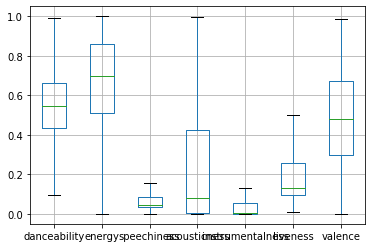

In [93]:
df.boxplot(column=['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'])
#Outliers have been removed

<AxesSubplot:>

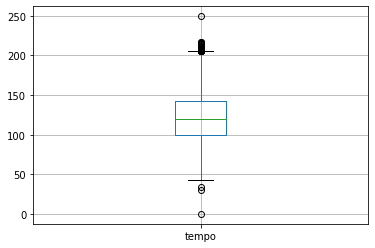

In [94]:
df.boxplot(column=['tempo'])

<AxesSubplot:>

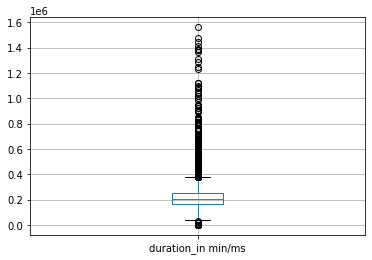

In [95]:
df.boxplot(column=['duration_in min/ms'])

In [96]:
lscore,upperscore = remove_outlier(df['tempo'])#calling remove_outlier function for tempo
df['instrumentalness']=np.where(df['tempo']>upperscore,upperscore,df['tempo'])#values which are greater than uscore are virtually removed
df['instrumentalness']=np.where(df['tempo']<lscore,lscore,df['tempo'])#values which are lesser than lscore are virtually removed

lscore,upperscore = remove_outlier(df['duration_in min/ms'])#calling remove_outlier function for duration_in min/ms
df['instrumentalness']=np.where(df['duration_in min/ms']>upperscore,upperscore,df['duration_in min/ms'])#values which are greater than uscore are virtually removed
df['instrumentalness']=np.where(df['duration_in min/ms']<lscore,lscore,df['duration_in min/ms'])#values which are lesser than lscore are virtually removed

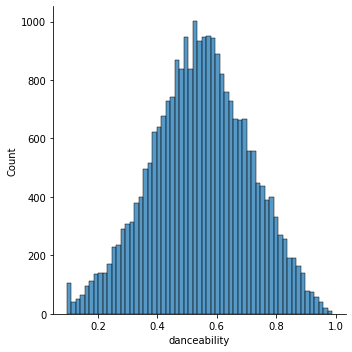

In [97]:
sns.displot(df['danceability'])

In [98]:
df.skew()
# loudness, speechiness, acousticness, instrumentalness, liveness and time_signature are highly skewed
#energy, mode, duration are moderately skewed

Popularity            0.076387
danceability         -0.089512
energy               -0.657512
key                  -0.160668
loudness             -1.739606
mode                 -0.581651
speechiness           1.172454
acousticness          1.120523
instrumentalness      1.446353
liveness              1.164000
valence               0.086867
tempo                 0.375790
duration_in min/ms    0.862642
time_signature       -4.240245
dtype: float64

In [99]:
df['speechiness']=np.cbrt(df['speechiness'])
print('speechiness ',df['speechiness'].skew())
print('acousticness ',np.cbrt(df['acousticness']).skew())
df['acousticness']=np.cbrt(df['acousticness'])
print('instrumentalness ',np.sqrt(df['instrumentalness']).skew())
df['instrumentalness']=np.sqrt(df['instrumentalness'])
print('liveness',np.cbrt(df['liveness']).skew())
df['liveness']=np.cbrt(df['liveness'])
print('energy',(df['energy']**2).skew())
df['energy']=df['energy']**2

speechiness  0.8055388890892917
acousticness  0.20008210871732107
instrumentalness  -0.4719057254642982
liveness 0.610486775227318
energy -0.004975487450278017


In [100]:
df.skew()

Popularity            0.076387
danceability         -0.089512
energy               -0.004975
key                  -0.160668
loudness             -1.739606
mode                 -0.581651
speechiness           0.805539
acousticness          0.200082
instrumentalness     -0.471906
liveness              0.610487
valence               0.086867
tempo                 0.375790
duration_in min/ms    0.862642
time_signature       -4.240245
dtype: float64

In [101]:
print('loudness ',np.cbrt(df['loudness']).skew())
df['loudness']=np.cbrt(df['loudness'])

loudness  -0.23202697201381525


In [102]:
df.skew()
#now most of the features are not highly skewed

Popularity            0.076387
danceability         -0.089512
energy               -0.004975
key                  -0.160668
loudness             -0.232027
mode                 -0.581651
speechiness           0.805539
acousticness          0.200082
instrumentalness     -0.471906
liveness              0.610487
valence               0.086867
tempo                 0.375790
duration_in min/ms    0.862642
time_signature       -4.240245
dtype: float64

In [103]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,25709.000000,25709.000000,2.570900e+04,25709.000000,25709.000000,25709.00000,25709.000000,25709.000000,25709.000000,25709.000000,25709.000000,25709.000000,2.570900e+04,25709.000000
mean,44.580886,0.544876,4.948656e-01,6.059979,-1.940471,0.63962,0.388416,0.463087,436.825572,0.545522,0.487282,122.729307,2.003485e+05,3.922245
std,17.202008,0.165760,2.823470e-01,3.046164,0.314512,0.48012,0.077170,0.317101,122.096012,0.117519,0.239539,29.617081,1.123260e+05,0.364073
min,1.000000,0.095000,4.080400e-10,1.000000,-3.418583,0.00000,0.000000,0.000000,192.433105,0.228305,0.000000,0.000000,5.016500e-01,0.000000
25%,33.000000,0.434000,2.590810e-01,4.000000,-2.120287,0.00000,0.326482,0.163491,407.543863,0.460573,0.300000,99.633000,1.660920e+05,4.000000
50%,43.000000,0.546000,4.900000e-01,7.000000,-1.911837,1.00000,0.361649,0.430528,457.242824,0.506580,0.482000,120.259000,2.090710e+05,4.000000
75%,56.000000,0.660000,7.413210e-01,8.000000,-1.731145,1.00000,0.436382,0.751847,502.128470,0.636610,0.672000,141.978000,2.521330e+05,4.000000
max,100.000000,0.989000,1.000000e+00,11.000000,1.106572,1.00000,0.537803,0.998665,1249.453080,0.792880,0.986000,249.438000,1.561133e+06,5.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25709 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         25709 non-null  object 
 1   Track Name          25709 non-null  object 
 2   Popularity          25709 non-null  float64
 3   danceability        25709 non-null  float64
 4   energy              25709 non-null  float64
 5   key                 25709 non-null  float64
 6   loudness            25709 non-null  float64
 7   mode                25709 non-null  int64  
 8   speechiness         25709 non-null  float64
 9   acousticness        25709 non-null  float64
 10  instrumentalness    25709 non-null  float64
 11  liveness            25709 non-null  float64
 12  valence             25709 non-null  float64
 13  tempo               25709 non-null  float64
 14  duration_in min/ms  25709 non-null  float64
 15  time_signature      25709 non-null  int64  
dtypes: fl

<AxesSubplot:>

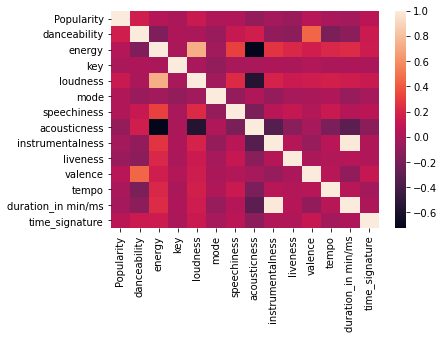

In [105]:
sns.heatmap(df.corr())

In [106]:
X_train=df.iloc[:17996,:16]#separating train and test
y_train=df_train.iloc[:17996,16]

In [107]:
X_train.drop(columns=['Artist Name','Track Name'],inplace=True)#dropping the str data type feature
X_train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,60.0,0.854,0.318096,1.0,-1.705862,1,0.364682,0.257631,484.351112,0.439510,0.8990,134.071,234596.0,4
1,54.0,0.382,0.662596,3.0,-1.933657,1,0.343697,0.103228,501.730007,0.465701,0.5690,116.454,251733.0,4
2,35.0,0.434,0.376996,6.0,-2.027455,1,0.374444,0.786222,331.160082,0.733104,0.7870,147.681,109667.0,4
3,66.0,0.853,0.356409,10.0,-1.868931,0,0.381444,0.276766,417.094713,0.495968,0.5690,107.033,173968.0,4
4,53.0,0.167,0.950625,2.0,-1.623482,1,0.537803,0.055288,479.541448,0.556130,0.0918,199.060,229960.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.011881,7.0,-2.576313,0,0.345661,0.997661,439.829512,0.461670,0.1770,171.587,193450.0,3
17992,27.0,0.638,0.049729,11.0,-2.166859,0,0.320429,0.950231,507.017751,0.413107,0.3350,73.016,257067.0,4
17993,34.0,0.558,0.962361,4.0,-1.673047,0,0.414470,0.030968,464.996774,0.792880,0.2620,105.000,216222.0,4
17994,29.0,0.215,0.648025,6.0,-2.336592,0,0.511723,0.108859,468.714199,0.634960,0.3550,131.363,219693.0,4


In [108]:
y_train

0         5
1        10
2         6
3         5
4        10
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 17996, dtype: int64

In [109]:
X_test=df.iloc[17996:,:]
X_test.drop(columns=['Artist Name','Track Name'],inplace=True)
X_test

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,73.0,0.310,0.162409,7.0,-2.390705,1,0.319452,0.417169,563.938826,0.518010,0.466,134.480,318027.000000,4
1,34.0,0.511,0.912025,1.0,-1.716676,1,0.505277,0.073681,469.481629,0.640696,0.291,151.937,220413.000000,4
2,78.0,0.700,0.502681,7.0,-1.710660,1,0.437778,0.168687,450.510821,0.306878,0.625,122.019,202960.000000,4
3,80.0,0.333,0.405769,1.0,-1.698961,0,0.387310,0.507875,415.563473,0.530146,0.132,139.898,172693.000000,4
4,48.0,0.393,0.720801,11.0,-1.602340,1,0.358045,0.161471,192.433105,0.545136,0.222,74.028,4.093117,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,28.0,0.816,0.859329,7.0,-1.164959,1,0.391487,0.641507,481.331487,0.418886,0.643,128.019,231680.000000,4
7709,45.0,0.429,0.358801,7.0,-1.934192,0,0.331107,0.293953,606.530296,0.712694,0.257,127.446,367879.000000,4
7710,38.0,0.805,0.819025,6.0,-1.932944,0,0.537803,0.541750,192.433105,0.389300,0.691,135.224,2.453550,4
7711,51.0,0.801,0.864900,9.0,-1.945618,1,0.328348,0.431961,470.446596,0.382130,0.967,133.255,221320.000000,4


# Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')#creating Logistic Regression model

In [111]:
X_train

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,60.0,0.854,0.318096,1.0,-1.705862,1,0.364682,0.257631,484.351112,0.439510,0.8990,134.071,234596.0,4
1,54.0,0.382,0.662596,3.0,-1.933657,1,0.343697,0.103228,501.730007,0.465701,0.5690,116.454,251733.0,4
2,35.0,0.434,0.376996,6.0,-2.027455,1,0.374444,0.786222,331.160082,0.733104,0.7870,147.681,109667.0,4
3,66.0,0.853,0.356409,10.0,-1.868931,0,0.381444,0.276766,417.094713,0.495968,0.5690,107.033,173968.0,4
4,53.0,0.167,0.950625,2.0,-1.623482,1,0.537803,0.055288,479.541448,0.556130,0.0918,199.060,229960.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.011881,7.0,-2.576313,0,0.345661,0.997661,439.829512,0.461670,0.1770,171.587,193450.0,3
17992,27.0,0.638,0.049729,11.0,-2.166859,0,0.320429,0.950231,507.017751,0.413107,0.3350,73.016,257067.0,4
17993,34.0,0.558,0.962361,4.0,-1.673047,0,0.414470,0.030968,464.996774,0.792880,0.2620,105.000,216222.0,4
17994,29.0,0.215,0.648025,6.0,-2.336592,0,0.511723,0.108859,468.714199,0.634960,0.3550,131.363,219693.0,4


In [112]:
model.fit(X_train,y_train) #fitting the model

LogisticRegression(solver='liblinear')

In [113]:
model.score(X_train,y_train)

0.3060124472104912

In [114]:
y_pred=model.predict(X_test)#prediction
pred=pd.get_dummies(y_pred)
pred

,0,2,3,4,5,7,8,9,10
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,0,0,0,1
7709,0,0,0,0,0,0,0,0,1
7710,1,0,0,0,0,0,0,0,0
7711,0,0,0,0,0,0,0,0,1


In [115]:
pred.sum()

0      319
2       50
3      187
4      216
5        1
7      112
8       29
9      317
10    6482
dtype: int64

# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=2,max_depth=15)#building random forest classifier 

In [117]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, random_state=2)

In [118]:
clf.score(X_train,y_train)

0.8326294732162702

In [119]:
y_pred2=clf.predict(X_test)#predicting

In [120]:
y_pred2

array([10,  8,  9, ...,  9,  6,  5])

In [121]:
pred2=pd.get_dummies(y_pred2)
pred2

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,0,0,0,0,1,0
7709,0,0,0,0,0,0,0,0,0,0,1
7710,0,0,0,0,0,0,0,0,0,1,0
7711,0,0,0,0,0,0,1,0,0,0,0


In [122]:
pred2.sum()#better predictions than earlier

0      324
1      183
2      313
3      153
4      191
5      671
6      690
7      242
8      628
9     1087
10    3231
dtype: int64

In [123]:
#feature importance against each variable
pd.Series(clf.feature_importances_, index=X_train.columns)

Popularity            0.085605
danceability          0.093388
energy                0.095358
key                   0.030237
loudness              0.084957
mode                  0.010895
speechiness           0.102580
acousticness          0.117102
instrumentalness      0.082287
liveness              0.052068
valence               0.083004
tempo                 0.057503
duration_in min/ms    0.098234
time_signature        0.006782
dtype: float64

# Stacking


In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier#

In [125]:
def model_predictions(model, train_x, train_y, test_x):
    #train the model
    model.fit(train_x,train_y)
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [126]:
DT=DecisionTreeClassifier(random_state= 0)
M1_train, M1_test = model_predictions(DT, X_train, y_train, X_test)

In [127]:
#Model 2 - Logistic Regression
LR=LogisticRegression(random_state= 1,solver='liblinear')
M2_train, M2_test = model_predictions(LR, X_train, y_train, X_test)

In [128]:
#Model 3 - k Nearest Neighbour
knn=KNeighborsClassifier()
M3_train, M3_test = model_predictions(knn, X_train, y_train, X_test)

In [129]:
#Creating a New train dataframe
train_prediction = {
              'DT': M1_train,
              'LR': M2_train,
              'knn': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,DT,LR,knn
0,5,10,5
1,10,10,10
2,6,10,6
3,5,10,10
4,10,10,8


In [130]:
#Creating a New test dataframe
test_prediction = {
              'DT': M1_test,
              'LR': M2_test,
              'knn': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,DT,LR,knn
0,6,10,2
1,8,10,10
2,9,10,9
3,9,10,5
4,0,7,7


In [131]:
# Stacker Model
model = LogisticRegression(solver='liblinear')
model.fit(train_predictions, y_train)
y_pred3=pd.get_dummies(model.predict(test_predictions))

In [132]:
y_pred3

,0,1,2,3,4,6,7,9,10
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7708,0,0,0,0,0,1,0,0,0
7709,0,0,0,0,0,0,0,0,1
7710,1,0,0,0,0,0,0,0,0
7711,0,0,0,0,0,0,0,0,1


In [133]:
y_pred3.sum()

0      277
1      946
2        4
3      167
4        1
6     1808
7      174
9      258
10    4078
dtype: int64

In [135]:
#random forest classifier predictions are better than others because it predicts all classes evenly
pred2.to_csv('mysubmissionfile.csv',index=False)